In [3]:
# Perform imports and load the dataset:
import pandas as pd
df = pd.read_csv("smsspamcollection.csv",encoding="ISO-8859-1")
df.shape
df.head()
df.info()
# Checking for null values
df.isnull().sum()
# Checking Duplicate values
df.duplicated().sum()
# Drop Duplicate values
df=df.drop_duplicates()
df.shape
# renaming the columns
df.columns = ['label', 'message']
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,label_num,message_len
count,653.0,653.000000
mean,1.0,137.891271
std,0.0,30.137753
min,1.0,13.000000
25%,1.0,132.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


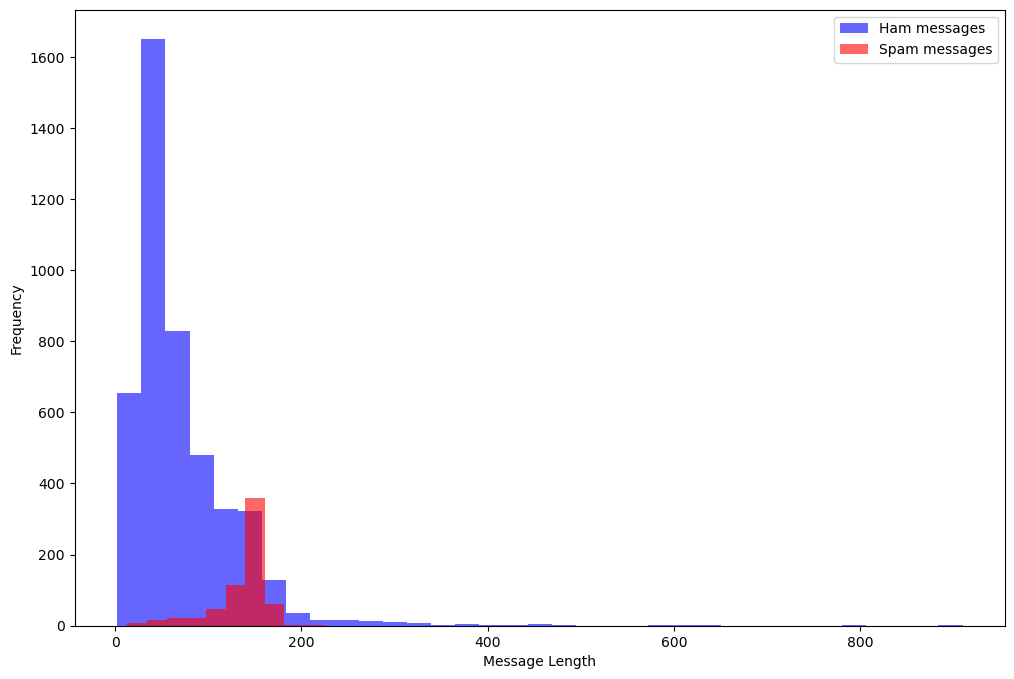

In [8]:
df.describe()
df.groupby('label').describe()
# convert label to a numerical variable
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()
df['message_len'] = df.message.apply(len)
df.head()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
 label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red',
 label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
df[df.label=='ham'].describe()
df[df.label=='spam'].describe()


In [19]:
pip install wordcloud

sms ac blind date    aberdeen unit kingdom check   blind date send hide


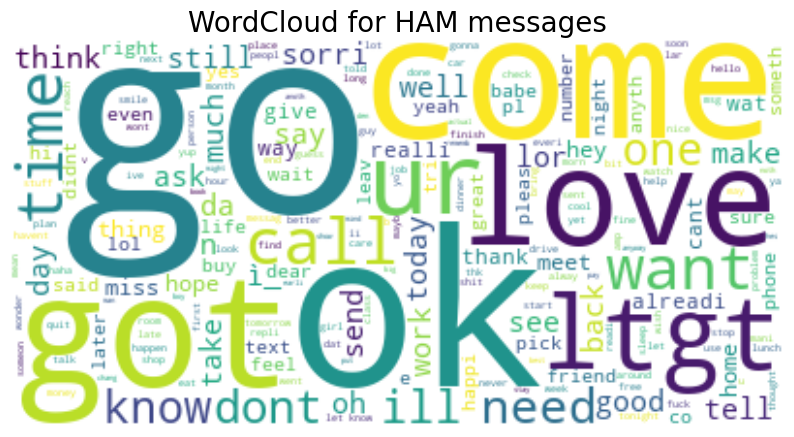

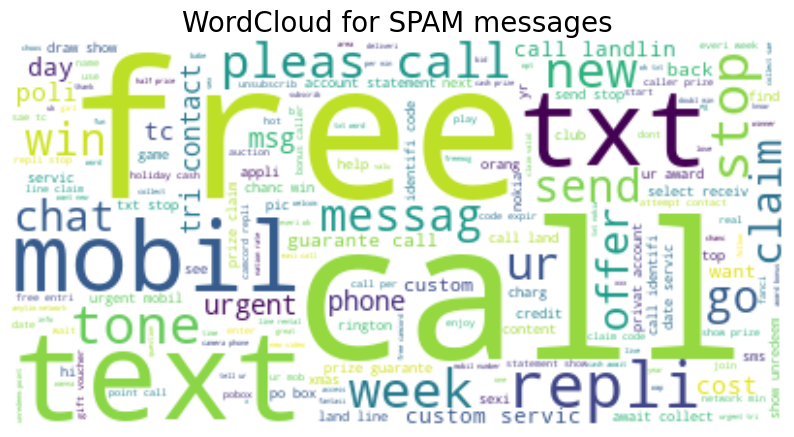

In [21]:
# import library
import re
import string
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords
stemmer = nltk.SnowballStemmer("english")
def preprocess(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text) # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text) # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text) # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text) # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) #remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split(' ')) #stemming
    return text
df['message_clean'] = df['message'].apply(preprocess)
df.head(20)
print(df['message_clean'][304])
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a WordCloud object
wc = WordCloud(
 background_color='white',
max_words=200,
 contour_color='steelblue', # Add contour color
 contour_width=2, # Add contour width
)
# Generate the WordCloud using text data for HAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 'ham', 'message_clean'])
wc.generate(ham_text)
# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for HAM messages', fontsize=20)
plt.axis('off')
plt.show()
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a WordCloud object
wc = WordCloud(
 background_color='white',
 max_words=200,
 contour_color='steelblue', # Add contour color
 contour_width=2, # Add contour width
)
# Generate the WordCloud using text data for SPAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 'spam', 'message_clean'])
wc.generate(ham_text)
# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for SPAM messages', fontsize=20)
plt.axis('off')
plt.show()


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(df['message_clean'])
y = df['label']

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)
# SVM
svm_clf = SVC(kernel='linear').fit(X_train, y_train)


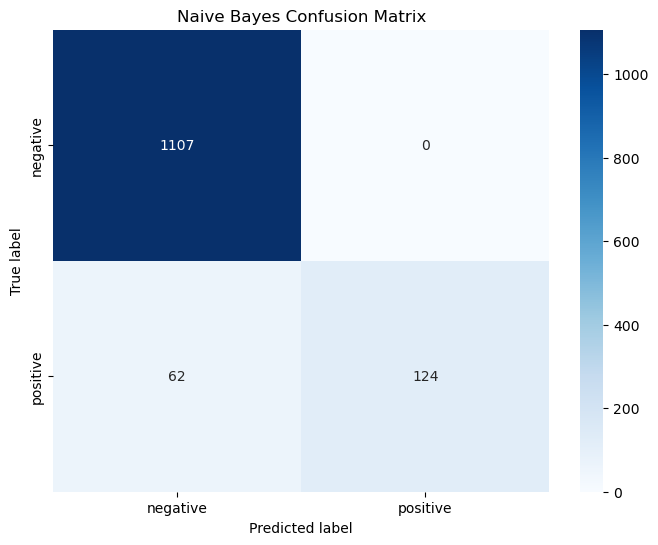

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1107
        spam       1.00      0.67      0.80       186

    accuracy                           0.95      1293
   macro avg       0.97      0.83      0.89      1293
weighted avg       0.95      0.95      0.95      1293


Naive Bayes Error Rate: 0.05


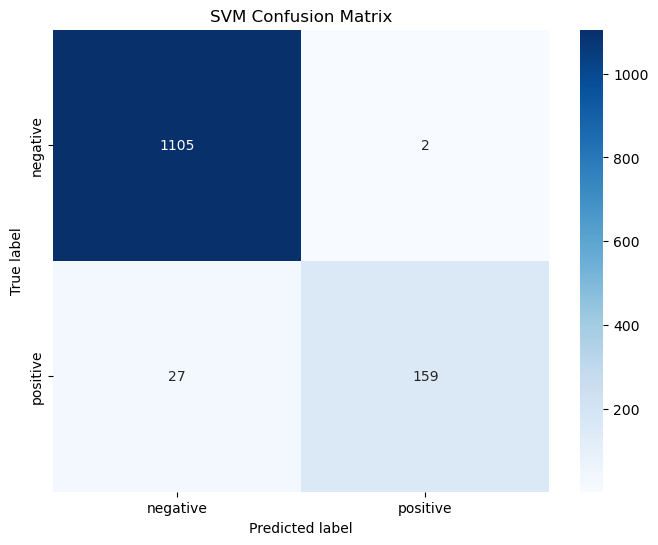


SVM Classifier Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.99      0.85      0.92       186

    accuracy                           0.98      1293
   macro avg       0.98      0.93      0.95      1293
weighted avg       0.98      0.98      0.98      1293


SVM Error Rate: 0.02


In [33]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score # Importing accuracy_score
# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)
# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)
nb_cm
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes,
yticklabels=classes)
 plt.title(title)
 plt.xlabel('Predicted label')
 plt.ylabel('True label')
 plt.show()
# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')
print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")
# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')
print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")

Label distribution in the dataset:
label
1    10
0     3
Name: count, dtype: int64

Training set label distribution:
label
1    8
0    2
Name: count, dtype: int64

Test set label distribution:
label
1    2
0    1
Name: count, dtype: int64

Naïve Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Naïve Bayes Accuracy: 0.67
Naïve Bayes Confusion Matrix:
[[0 1]
 [0 2]]

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67 

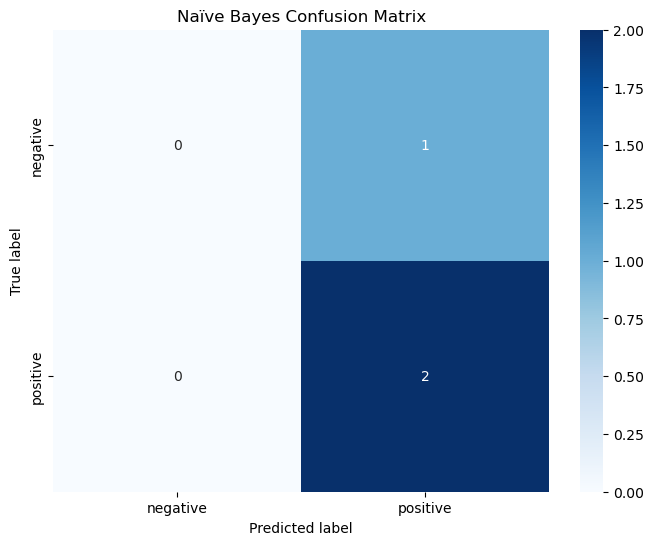

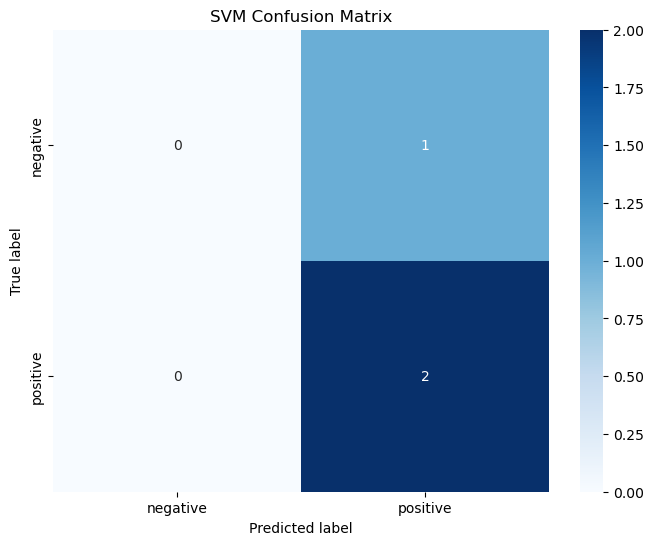

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Processed_Reviews_2.csv")

X = df['lemmatized'] 
y = df['label']  

print("Label distribution in the dataset:")
print(y.value_counts())

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set label distribution:")
print(y_train.value_counts())
print("\nTest set label distribution:")
print(y_test.value_counts())

nb_clf = MultinomialNB()  # Naïve Bayes classifier
svm_clf = SVC(kernel='linear')  # Support Vector Machine (SVM) classifier

# Train the Naïve Bayes classifier
nb_clf.fit(X_train, y_train)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Naïve Bayes evaluation
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted, zero_division=0)
nb_accuracy = accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted, labels=[0, 1]) 

# SVM evaluation
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted, zero_division=0)
svm_accuracy = accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted, labels=[0, 1])

# Display results for Naïve Bayes
print("\nNaïve Bayes Classifier Report:")
print(nb_report)
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")
print("Naïve Bayes Confusion Matrix:")
print(nb_cm)

# Display results for SVM
print("\nSVM Classifier Report:")
print(svm_report)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Confusion Matrix:")
print(svm_cm)


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naïve Bayes Confusion Matrix')
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')